## Yule-Walker in matrix form

$$
\begin{aligned}
\rho(k) = \phi_1\rho(k-1) + \phi_2\rho(k-2) + \dots + \phi_p\rho(k-p) \\
\rho(1) = \phi_1\rho(0) + \phi_2\rho(-1) + \dots + \phi_p\rho(1-p) \\
\rho(2) = \phi_1\rho(1) + \phi_2\rho(0) + \dots + \phi_p\rho(2-p) \\
\dots
\end{aligned}
$$

Note:
* $\rho(-k) = \rho(k)$
* $\rho(0) = 1$

Matrix form:

$$
\begin{bmatrix}
\ \rho(1) \\
\ \rho(2) \\ 
\ \rho(3) \\ 
\ \dots \
\end{bmatrix}
=
\begin{bmatrix}
1 & \rho(1) & \dots & \rho(p-1) \\ 
\rho(1) & 1 & \dots & \rho(p-2) \\ 
\rho(2) & \rho(1) & \dots & \rho(p-3) \\ 
\dots
\end{bmatrix}
\begin{bmatrix}
\ \phi(1) \\
\ \phi(2) \\ 
\ \phi(3) \\ 
\ \dots \
\end{bmatrix}
$$

$$
\hat{\rho} = R\hat{\phi} \\
R^{-1}\hat{\rho} = \hat{\phi}
$$

**Problem**

Sample autocorrelation coefficients of an AR(3) process are given: $r_1=0.8, r_2=0.6, r_3=0.2$ Use Yule-Walker equations in matrix form to estimate model parameters $\hat{\phi}_1,  \hat{\phi}_2, \hat{\phi}_3$.

In [14]:
A = matrix(list(
    c(1.0, .8, .6),
    c(.8, 1.0, .8),
    c(.6, .8, 1.0)
))
b = as.matrix(c(.8, .6, .2),3,1)
x = solve(A,b)
x # should be [ 0.8125,  0.5   , -0.6875], code does not work though, but this is syntax issue

ERROR: Error in solve.default(A, b): 'a' must be a numeric matrix


## $\sigma_Z$ estimation

$$
\sigma_Z^2 = c_0*(1- \sum \phi_i r_i)
$$

where $c_0$ is autocovariance at lag 0 (so basically variance).

R code:

```R
c0=acf(ar.process, type='covariance', plot=F)$acf[1]
var.hat=c0*(1-sum(phi.hat*r))
var.hat
```

**Problem**

Use Question 2 information and the fact that sample autocovariance at lag 0, $c(0)=5$.

In [15]:
5*(1-sum(x*b))

ERROR: Error in eval(expr, envir, enclos): object 'x' not found


### Model

Note, we first need to subtract $\mu$ of X from $X_t$ in order to solve with Yule-Walker equations, so our model becomes:

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + Z_t \\
X_t - \bar{x} = \phi_1 (X_{t-1} - \bar{x}) + \phi_2 (X_{t-2} - \bar{x}) + \dots + \phi_p (X_{t-p} - \bar{x}) + Z_t \\
X_t = \phi_1 X_{t-1} \dots - \phi_1 \bar{x} - \dots + \bar{x} + Z_t \\
X_t = \phi_1 X_{t-1} \dots + \bar{x} - \bar{x}\sum \phi_i + Z_t \\
X_t = \phi_1 X_{t-1} \dots + \bar{x} (1 - \sum \phi_i) + Z_t
$$

we take out $\bar{x} (1 - \sum \phi_i) = \phi_0$ and our final model with its original mean _restored_ becomes:

$$
X_t = \phi_1 X_{t-1} \dots + \phi_0 + Z_t
$$

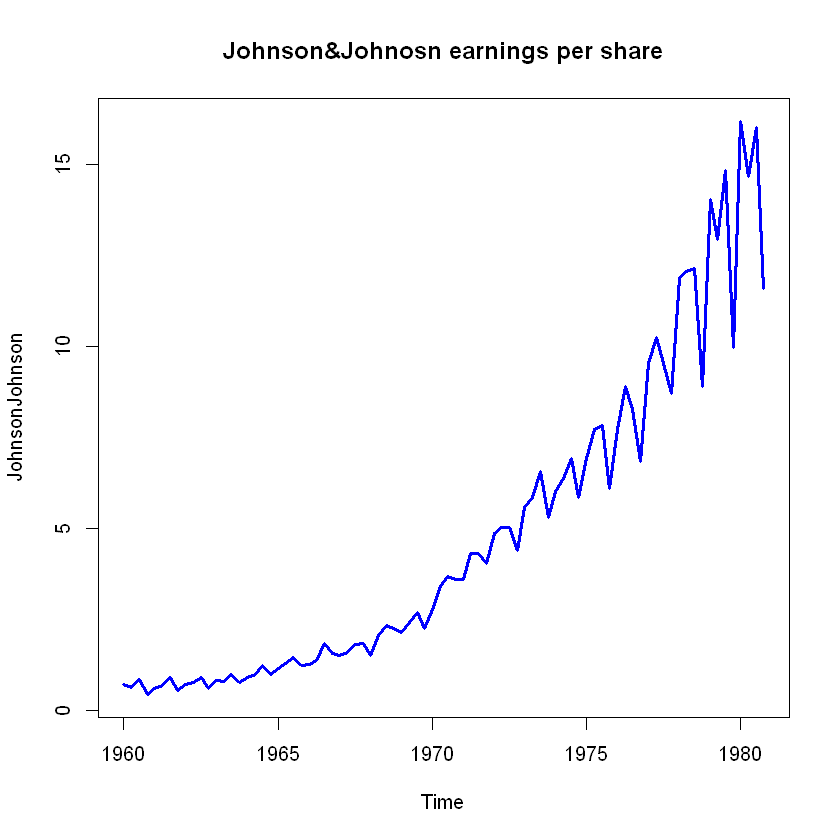

In [16]:
plot(JohnsonJohnson, main='Johnson&Johnosn earnings per share', col='blue', lwd=3)

It clearly has a trend in mean and variance. So it is not stationary. We have to transform it first with log return function:

$$
r_t = \log(\frac{X_t}{X_{t-1}}) = \log(X_t) - \log(X_{t-1})
$$

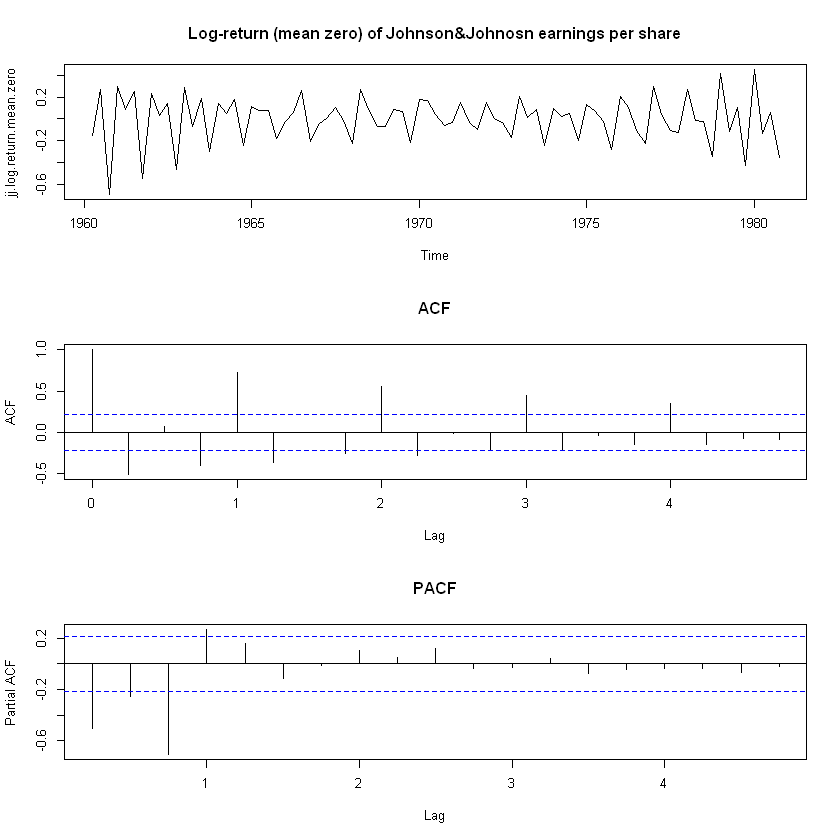

In [19]:
jj.log.return=diff(log(JohnsonJohnson))
jj.log.return.mean.zero=jj.log.return-mean(jj.log.return)

# Plots for log-returns
par(mfrow=c(3,1))
plot(jj.log.return.mean.zero, main='Log-return (mean zero) of Johnson&Johnosn earnings per share')
acf(jj.log.return.mean.zero, main='ACF')
pacf(jj.log.return.mean.zero, main='PACF')

From PACF we can see that after lag 4, there are no significant lags, so this suggest that we can fit AR(4) model.

In [20]:
# Order
p=4
# sample autocorreleation function r
r=NULL
r[1:p]=acf(jj.log.return.mean.zero, plot=F)$acf[2:(p+1)]
r

[1] -0.50681760  0.06710084 -0.40283604  0.73144780

In [21]:
# matrix R
R=matrix(1,p,p) # matrix of dimension 4 by 4, with entries all 1's.

# define non-diagonal entires of R
for(i in 1:p){
	for(j in 1:p){
		if(i!=j)
			R[i,j]=r[abs(i-j)]
		}
	}
R

1.00000000,-0.50681760,0.06710084,-0.40283604
-0.50681760,1.00000000,-0.50681760,0.06710084
0.06710084,-0.50681760,1.00000000,-0.50681760
-0.40283604,0.06710084,-0.50681760,1.00000000


In [22]:
# b-column vector on the right
b=matrix(r,p,1)# b- column vector with no entries
b

-0.50681760
0.06710084
-0.40283604
0.73144780


In [23]:
phi.hat=solve(R,b)[,1]
phi.hat

[1] -0.6293492 -0.5171526 -0.4883374  0.2651266

In [24]:
# Variance estimation using Yule-Walker Estimator
c0=acf(jj.log.return.mean.zero, type='covariance', plot=F)$acf[1]
c0
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 0.04365692

[1] 0.01419242

In [25]:
# Constant term in the model
phi0.hat=mean(jj.log.return)*(1-sum(phi.hat))
phi0.hat

[1] 0.079781

In [26]:
cat("Constant:", phi0.hat," Coeffcinets:", phi.hat, " and Variance:", var.hat, '\n')

Constant: 0.079781  Coeffcinets: -0.6293492 -0.5171526 -0.4883374 0.2651266  and Variance: 0.01419242 
